In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Trends on SSL w/Violent Crime Across Demographics

The UChicago Crime Lab did a [report on gun violence in Chicago](http://urbanlabs.uchicago.edu/attachments/store/2435a5d4658e2ca19f4f225b810ce0dbdb9231cbdb8d702e784087469ee3/UChicagoCrimeLab+Gun+Violence+in+Chicago+2016.pdf) describing potential reasons for the recent increase. It also describes some demographic trends around gun violence, so it's worth seeing if they align to the demographic patterns on the SSL.

The Crime Lab analysis indicated that 78% of homicide victims in Chicago in 2016 were Black, with 79% of victims being Black in 2015. Hispanic victims were 16% of the city's totals in 2015 and 2016, and White victims made up 4% and 5% in 2015 and 2016 respectively. It's a potentially valid reply to claims of racial overrepresentation on the SSL that there are racial disparities in crime in Chicago. However, while most of the SSL's input variables address crime, not all do, and a majority of individuals with scores have no record of a violent crime.

**Note:** Consolidating Black and White Hispanic categories

In [2]:
ssl_df = pd.read_csv('data/Strategic_Subject_List.csv')
# Converting CPD race codes to clear meanings
cpd_race_map = {
    'BLK': 'BLACK',
    'WHI': 'WHITE',
    'API': 'ASIAN/PACIFIC ISLANDER',
    'WBH': 'HISPANIC',
    'WWH': 'HISPANIC',
    'I': 'AMER IND/ALASKAN NATIVE',
    'U': 'UNKNOWN'
}
cpd_racial_categories = ['BLACK', 'WHITE', 'ASIAN/PACIFIC ISLANDER', 'HISPANIC', 'AMER IND/ALASKAN NATIVE', 'UNKNOWN']

ssl_df['RACE'] = ssl_df['RACE_CODE_CD'].apply(lambda x: cpd_race_map.get(x, 'U'))
ssl_df.info(verbose=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398684 entries, 0 to 398683
Data columns (total 49 columns):
SSL_SCORE                                   398684 non-null int64
PREDICTOR_RAT_AGE_AT_LATEST_ARREST          398582 non-null object
PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS     398684 non-null int64
PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT     398684 non-null int64
PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES      398684 non-null int64
PREDICTOR_RAT_GANG_AFFILIATION              398684 non-null int64
PREDICTOR_RAT_NARCOTIC_ARRESTS              398684 non-null int64
PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY    398684 non-null float64
PREDICTOR_RAT_UUW_ARRESTS                   398684 non-null int64
SEX_CODE_CD                                 398684 non-null object
RACE_CODE_CD                                398684 non-null object
WEAPON_I                                    398684 non-null object
DRUG_I                                      398684 non-null object
AGE_GROUP               

In [3]:
# Removing individuals outside of the city
chi_ssl_df = ssl_df.loc[ssl_df['LATEST_DIST_RES'] != 31].copy()
chi_ssl_df.shape

(214738, 49)

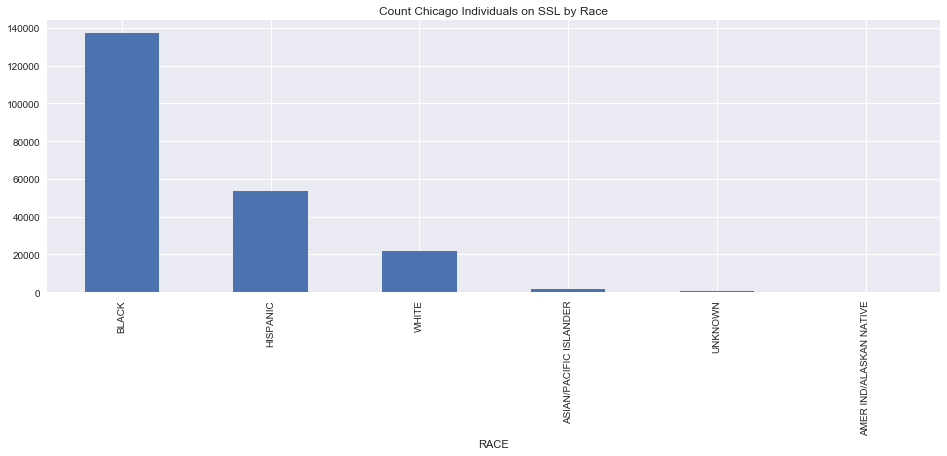

In [4]:
plt.rcParams["figure.figsize"] = [16, 5]

chi_ssl_race = chi_ssl_df.groupby('RACE')['SSL_SCORE'].count()
chi_ssl_race.sort_values(ascending=False, inplace=True)
chi_ssl_race.plot(kind='bar', title='Count Chicago Individuals on SSL by Race')

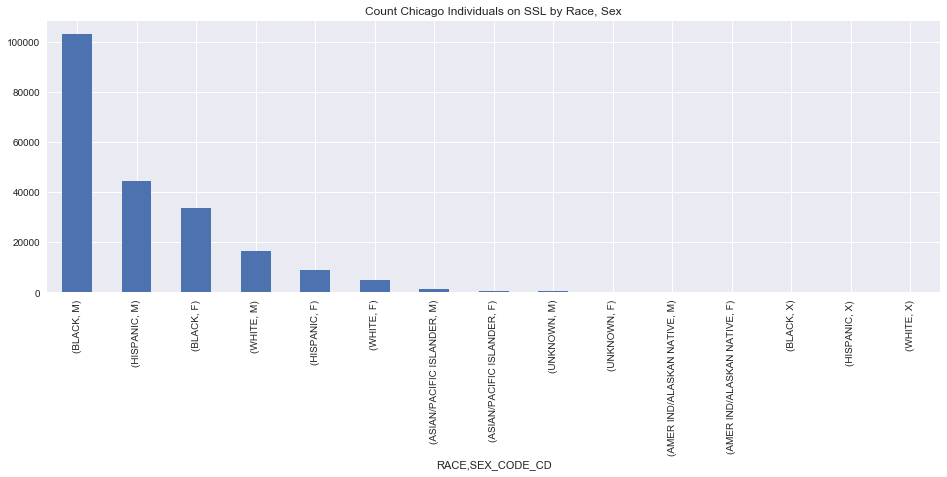

In [5]:
chi_ssl_race_sex = chi_ssl_df.groupby(['RACE', 'SEX_CODE_CD'])['SSL_SCORE'].count()
chi_ssl_race_sex.sort_values(ascending=False, inplace=True)
chi_ssl_race_sex.plot(kind='bar', title='Count Chicago Individuals on SSL by Race, Sex')

In [6]:
for r in cpd_racial_categories:
    print('{:,} or {:.2f}%, of Chicago residents on SSL are {}'.format(
        chi_ssl_race[r], (chi_ssl_race[r]/chi_ssl_race.sum())*100, r)
     )

137,157 or 63.87%, of Chicago residents on SSL are BLACK
21,488 or 10.01%, of Chicago residents on SSL are WHITE
1,807 or 0.84%, of Chicago residents on SSL are ASIAN/PACIFIC ISLANDER
53,651 or 24.98%, of Chicago residents on SSL are HISPANIC
142 or 0.07%, of Chicago residents on SSL are AMER IND/ALASKAN NATIVE
493 or 0.23%, of Chicago residents on SSL are UNKNOWN


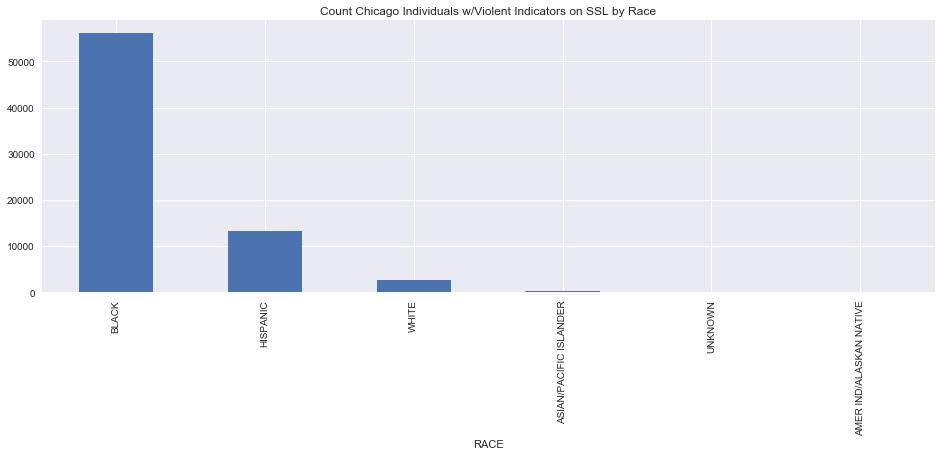

In [7]:
# Just looking at individuals with predictors related to violence or guns
chi_ssl_violent = chi_ssl_df.loc[(chi_ssl_df['PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES'] > 0) |
                                 (chi_ssl_df['PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS'] > 0) |
                                 (chi_ssl_df['PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT'] > 0) | 
                                 (chi_ssl_df['PREDICTOR_RAT_GANG_AFFILIATION'] != 0) |
                                 (chi_ssl_df['PREDICTOR_RAT_UUW_ARRESTS'] > 0)].copy()
chi_ssl_violent_race = chi_ssl_violent.groupby('RACE')['SSL_SCORE'].count()
chi_ssl_violent_race.sort_values(ascending=False, inplace=True)
chi_ssl_violent_race.plot(kind='bar', title='Count Chicago Individuals w/Violent Indicators on SSL by Race')

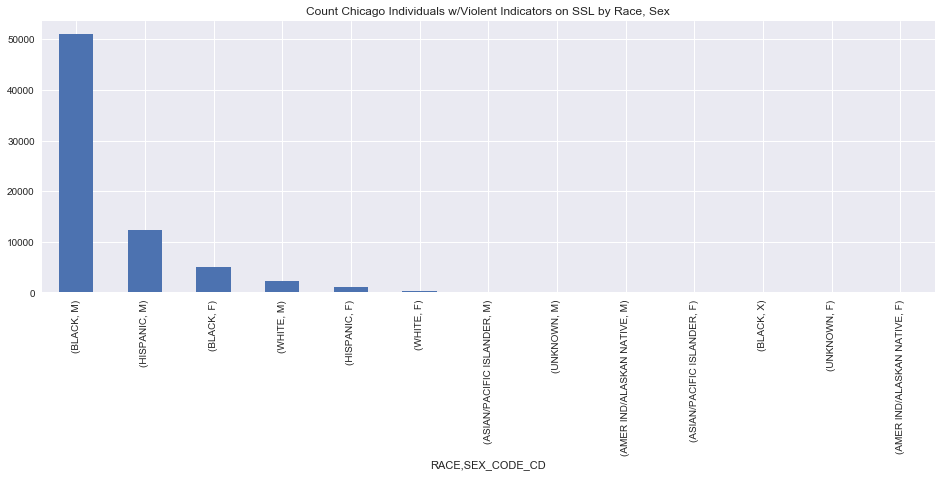

In [8]:
chi_ssl_violent_race_sex = chi_ssl_violent.groupby(['RACE', 'SEX_CODE_CD'])['SSL_SCORE'].count()
chi_ssl_violent_race_sex.sort_values(ascending=False, inplace=True)
chi_ssl_violent_race_sex.plot(kind='bar', title='Count Chicago Individuals w/Violent Indicators on SSL by Race, Sex')

In [9]:
print('{:,}, or {:.2f}%, of {:,} total Chicago residents on the SSL have explicitly violent indicators\n'.format(
    chi_ssl_violent_race.sum(), (chi_ssl_violent_race.sum()/chi_ssl_race.sum())*100, chi_ssl_race.sum()
))

for r in cpd_racial_categories:
    print('{:,} or {:.2f}%, of Chicago residents with explicitly violent indicators on SSL are {}'.format(
        chi_ssl_violent_race[r], (chi_ssl_violent_race[r]/chi_ssl_violent_race.sum())*100, r)
     )

72,143, or 33.60%, of 214,738 total Chicago residents on the SSL have explicitly violent indicators

56,119 or 77.79%, of Chicago residents with explicitly violent indicators on SSL are BLACK
2,508 or 3.48%, of Chicago residents with explicitly violent indicators on SSL are WHITE
192 or 0.27%, of Chicago residents with explicitly violent indicators on SSL are ASIAN/PACIFIC ISLANDER
13,234 or 18.34%, of Chicago residents with explicitly violent indicators on SSL are HISPANIC
31 or 0.04%, of Chicago residents with explicitly violent indicators on SSL are AMER IND/ALASKAN NATIVE
59 or 0.08%, of Chicago residents with explicitly violent indicators on SSL are UNKNOWN


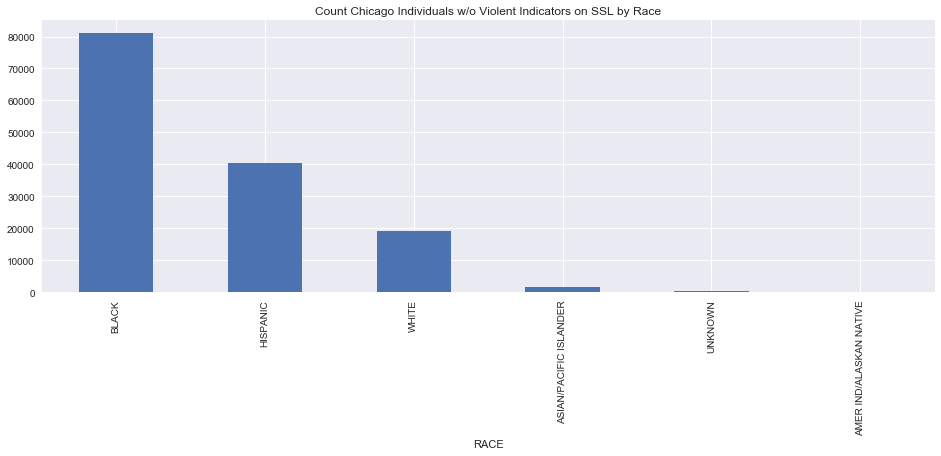

In [10]:
chi_ssl_non_violent = chi_ssl_df.loc[(chi_ssl_df['PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES'] == 0) &
                                 (chi_ssl_df['PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS'] == 0) &
                                 (chi_ssl_df['PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT'] == 0) &
                                 (chi_ssl_df['PREDICTOR_RAT_GANG_AFFILIATION'] == 0) &
                                 (chi_ssl_df['PREDICTOR_RAT_UUW_ARRESTS'] == 0)].copy()

chi_ssl_non_violent_race = chi_ssl_non_violent.groupby('RACE')['SSL_SCORE'].count()
chi_ssl_non_violent_race.sort_values(ascending=False, inplace=True)
chi_ssl_non_violent_race.plot(kind='bar', title='Count Chicago Individuals w/o Violent Indicators on SSL by Race')

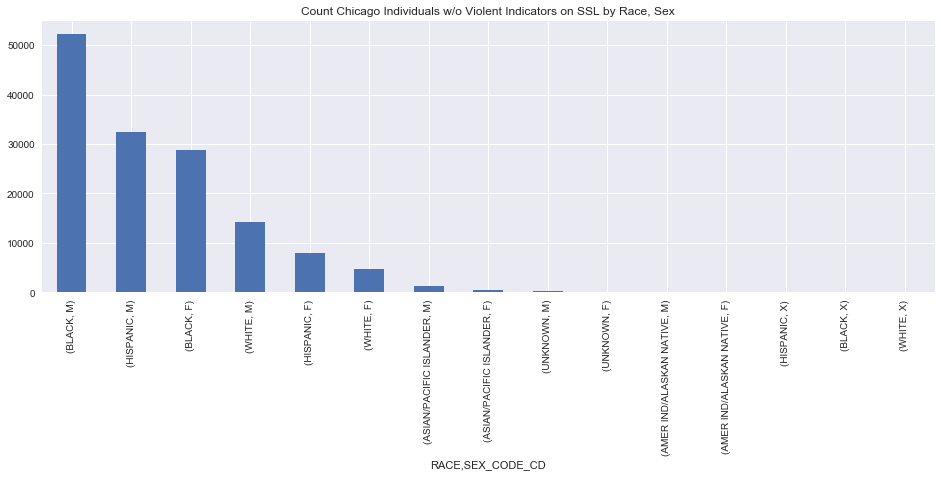

In [11]:
chi_ssl_non_violent_race_sex = chi_ssl_non_violent.groupby(['RACE', 'SEX_CODE_CD'])['SSL_SCORE'].count()
chi_ssl_non_violent_race_sex.sort_values(ascending=False, inplace=True)
chi_ssl_non_violent_race_sex.plot(kind='bar', title='Count Chicago Individuals w/o Violent Indicators on SSL by Race, Sex')

In [12]:
print('{:,}, or {:.2f}%, of {:,} total Chicago residents on the SSL do not have explicitly violent indicators\n'.format(
    chi_ssl_non_violent_race.sum(), (chi_ssl_non_violent_race.sum()/chi_ssl_race.sum())*100, chi_ssl_race.sum()
))

for r in cpd_racial_categories:
    print('{:,} or {:.2f}%, of Chicago residents with no explicitly violent indicators on SSL are {}'.format(
        chi_ssl_non_violent_race[r], (chi_ssl_non_violent_race[r]/chi_ssl_non_violent_race.sum())*100, r)
     )

142,595, or 66.40%, of 214,738 total Chicago residents on the SSL do not have explicitly violent indicators

81,038 or 56.83%, of Chicago residents with no explicitly violent indicators on SSL are BLACK
18,980 or 13.31%, of Chicago residents with no explicitly violent indicators on SSL are WHITE
1,615 or 1.13%, of Chicago residents with no explicitly violent indicators on SSL are ASIAN/PACIFIC ISLANDER
40,417 or 28.34%, of Chicago residents with no explicitly violent indicators on SSL are HISPANIC
111 or 0.08%, of Chicago residents with no explicitly violent indicators on SSL are AMER IND/ALASKAN NATIVE
434 or 0.30%, of Chicago residents with no explicitly violent indicators on SSL are UNKNOWN


### Victimization Demographics

Looking at those victims of shootings or assault in Chicago. This also lines up relatively cleanly with the Crime Lab numbers of homicide victims by race.

In [13]:
chi_ssl_victims = chi_ssl_df.loc[(chi_ssl_df['PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS'] > 0) |
                                 (chi_ssl_df['PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT'] >0 )].copy()

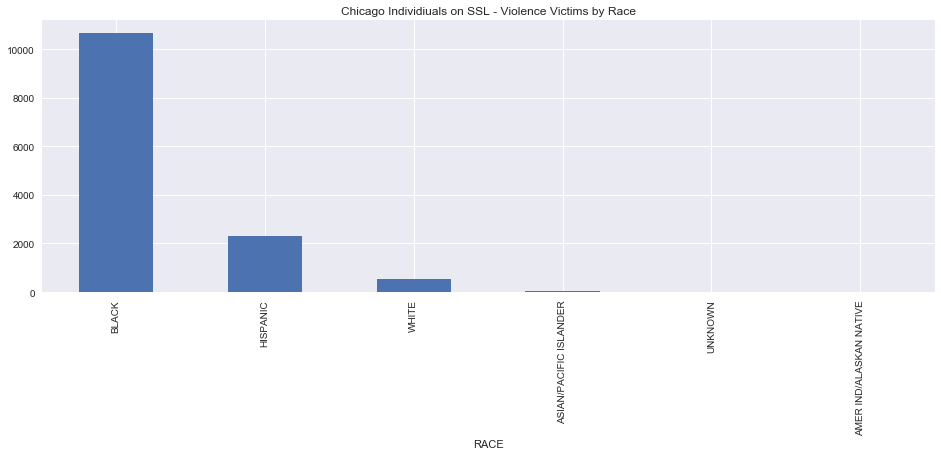

In [14]:
chi_ssl_victims_by_race = chi_ssl_victims.groupby('RACE')['SSL_SCORE'].count()
chi_ssl_victims_by_race.sort_values(ascending=False, inplace=True)
chi_ssl_victims_by_race.plot(kind='bar', title='Chicago Individiuals on SSL - Violence Victims by Race')

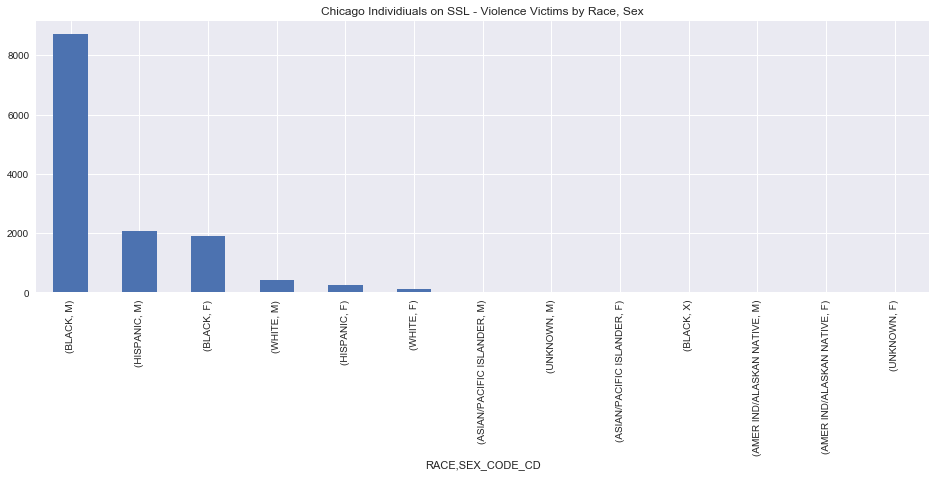

In [15]:
chi_ssl_victims_by_race_sex = chi_ssl_victims.groupby(['RACE', 'SEX_CODE_CD'])['SSL_SCORE'].count()
chi_ssl_victims_by_race_sex.sort_values(ascending=False, inplace=True)
chi_ssl_victims_by_race_sex.plot(kind='bar', title='Chicago Individiuals on SSL - Violence Victims by Race, Sex')

In [16]:
print('{:,}, or {:.2f}%, of {:,} total Chicago individuals on SSL have been the victims or a shooting or assault\n'.format(
    chi_ssl_victims['SSL_SCORE'].count(), (chi_ssl_victims['SSL_SCORE'].count()/chi_ssl_df['SSL_SCORE'].count())*100, chi_ssl_df['SSL_SCORE'].count()
))

for r in cpd_racial_categories:
    print('{:,} or {:.2f}%, of Chicago residents who have been victims of violence on SSL are {}'.format(
        chi_ssl_victims_by_race[r], (chi_ssl_victims_by_race[r]/chi_ssl_victims_by_race.sum())*100, r)
     )

13,544, or 6.31%, of 214,738 total Chicago individuals on SSL have been the victims or a shooting or assault

10,656 or 78.68%, of Chicago residents who have been victims of violence on SSL are BLACK
523 or 3.86%, of Chicago residents who have been victims of violence on SSL are WHITE
33 or 0.24%, of Chicago residents who have been victims of violence on SSL are ASIAN/PACIFIC ISLANDER
2,318 or 17.11%, of Chicago residents who have been victims of violence on SSL are HISPANIC
5 or 0.04%, of Chicago residents who have been victims of violence on SSL are AMER IND/ALASKAN NATIVE
9 or 0.07%, of Chicago residents who have been victims of violence on SSL are UNKNOWN


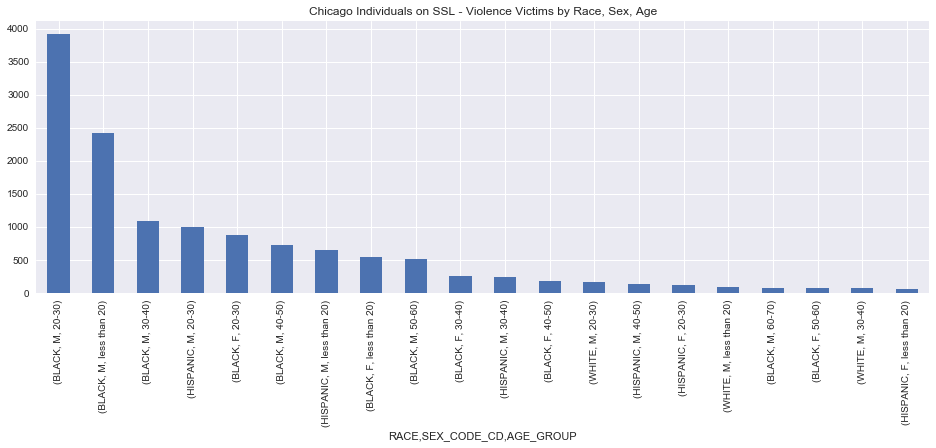

In [17]:
chi_ssl_victims_by_race_sex_age = chi_ssl_victims.groupby(['RACE', 'SEX_CODE_CD', 'AGE_GROUP'])['SSL_SCORE'].count()
chi_ssl_victims_by_race_sex_age.sort_values(ascending=False, inplace=True)
chi_ssl_victims_by_race_sex_age[:20].plot(kind='bar', title='Chicago Individuals on SSL - Violence Victims by Race, Sex, Age')